In [16]:
import sqlite3
import cv2
import os.path
import sys
import numpy as np
from matplotlib import pyplot as plt
from time import perf_counter_ns

from facenet_pytorch import MTCNN

sys.path.append('../src/')
from benchmark import Accuracy, Face, Box, Prediction, ImageFaces

In [17]:
images_home = '../../AFLW/images'

In [18]:
conn = sqlite3.connect('../src/aflw.sqlite')
c = conn.cursor()

In [19]:
query_string = "SELECT image_id, filepath, Faces.face_id, x, y, w, h FROM FaceImages, Faces, FaceRect WHERE FaceImages.file_id = Faces.file_id AND Faces.face_id = FaceRect.face_id LIMIT 50"

In [20]:
box_counter = 0

In [21]:
image_data_dict = {}

for row in c.execute(query_string):
    file_path = str(row[1])
    input_path = images_home + '/' + file_path
    
    if(os.path.isfile(input_path) == True):
        image_id = row[0]
        face_id = row[2]
        face_x = row[3]
        face_y = row[4]
        face_w = row[5]
        face_h = row[6]
        
        face = Face(face_id, Box(box_counter, face_x, face_y, face_w, face_h))
        box_counter += 1
        
        if image_id in image_data_dict:
            image_data_dict[image_id].add_face(face)
        else:
            img_face = ImageFaces(image_id, input_path)
            img_face.add_face(face)
            
            image_data_dict[image_id] = img_face

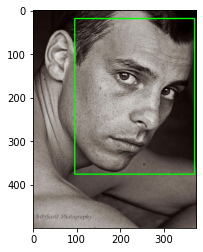

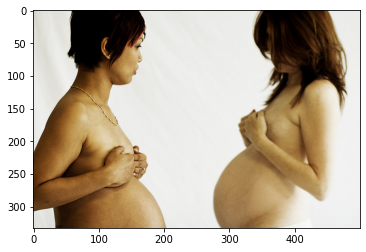

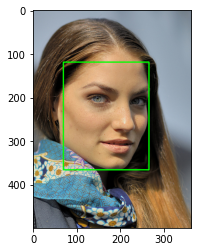

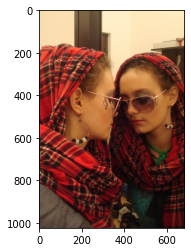

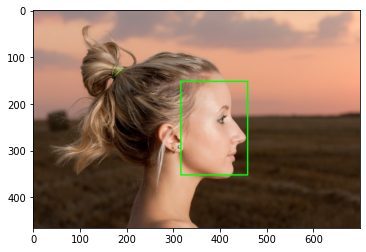

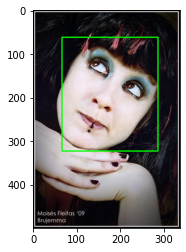

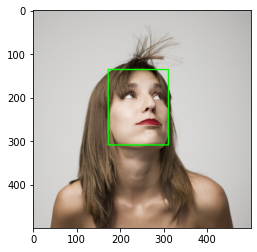

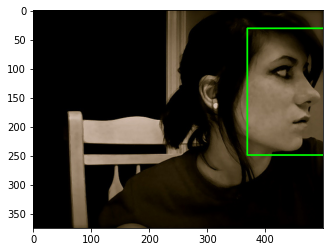

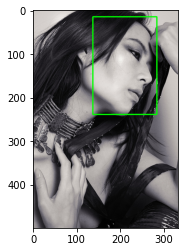

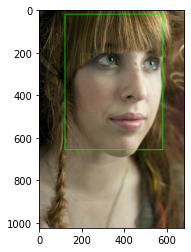

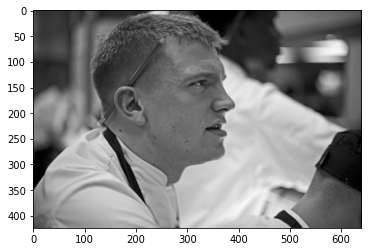

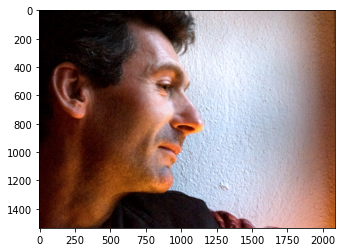

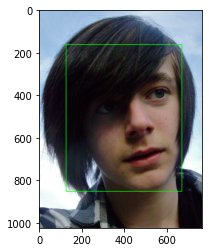

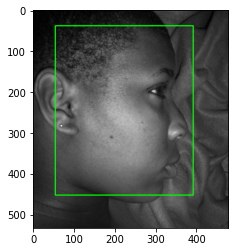

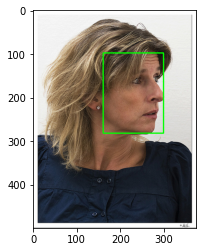

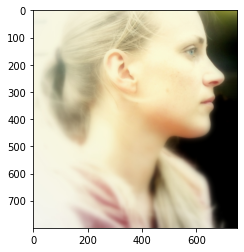

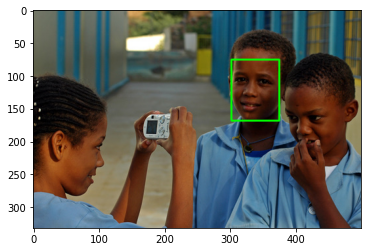

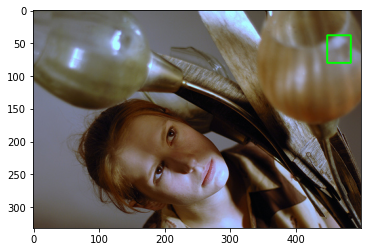

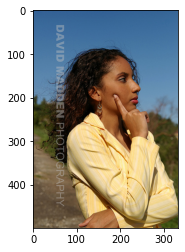

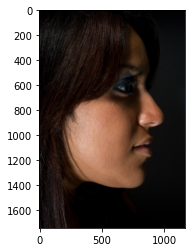

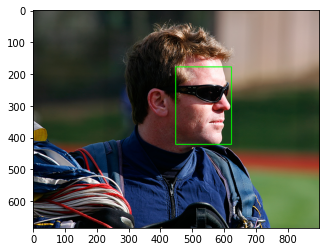

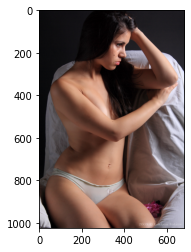

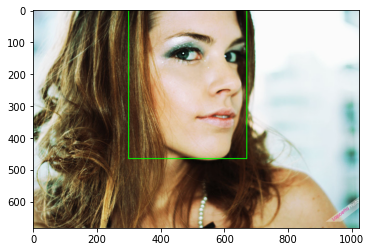

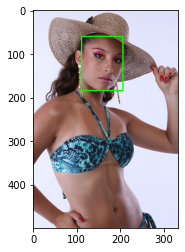

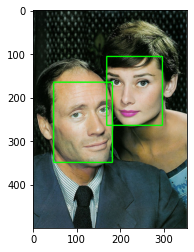

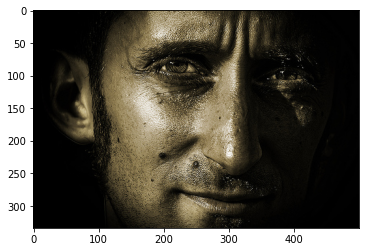

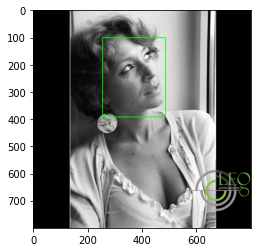

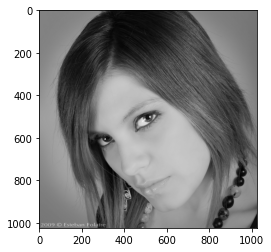

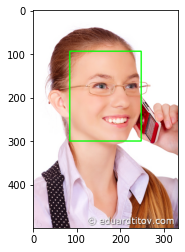

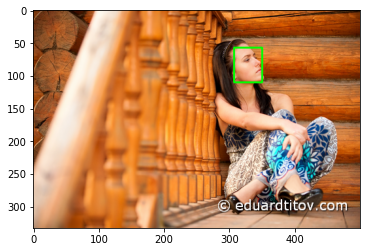

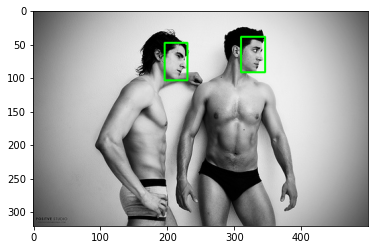

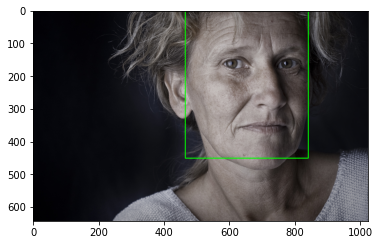

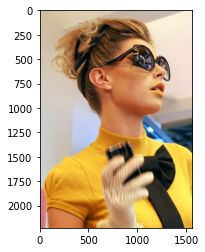

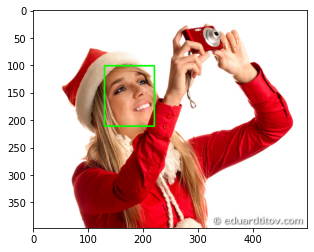

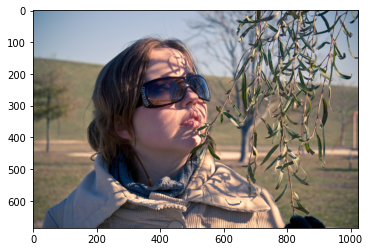

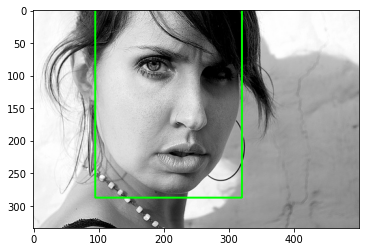

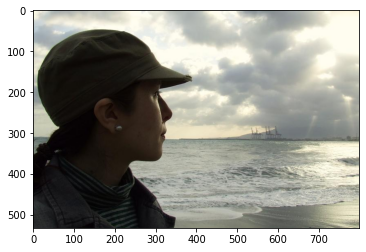

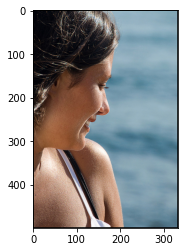

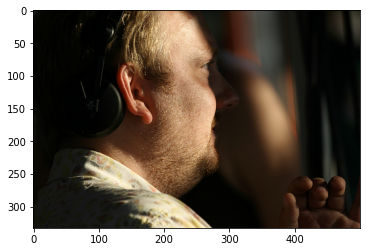

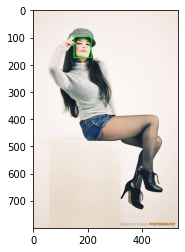

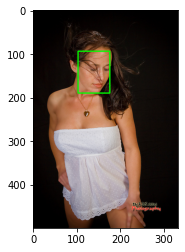

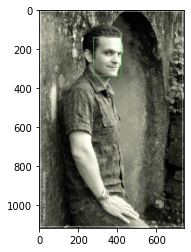

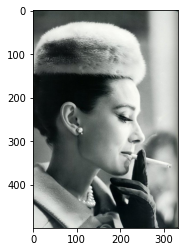

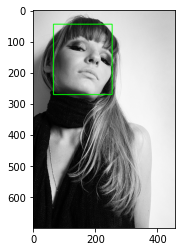

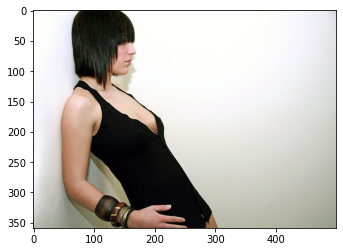

In [33]:
mtcnn = MTCNN(margin=14,
    factor=0.6,
    keep_all=True)

for face_image in image_data_dict.values():
    box_id = 0
    img = cv2.imread(face_image.image_path)
    
    t1_start = perf_counter_ns()
    boxes, probs = mtcnn.detect(img)

    if boxes is not None:
        for box in boxes:
            box = [int(b) for b in box]

            x = box[0]
            y = box[1]
            x2 = box[2]
            y2 = box[3]

            cv2.rectangle(img, (x, y), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()